In [71]:
# import numpy as np
# import matplotlib.pyplot as plt

# ax = plt.figure().add_subplot(projection='3d')

# x = np.linspace(0, 1, 100)
# y = np.sin(x * 2 * np.pi) / 2 + 0.5
# ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# colors = ('r', 'g', 'b', 'k')

# np.random.seed(19680801)

# x = np.random.sample(20 * len(colors))
# y = np.random.sample(20 * len(colors))
# c_list = []
# for c in colors:
#     c_list.extend([c] * 20)
# ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# ax.legend()
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# ax.view_init(elev=20., azim=-35)

# plt.show()

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [73]:
dataset = r'https://raw.githubusercontent.com/rafaelpuyau/infinity_school/main/ds/datasets/wines.csv'
df = pd.read_csv(dataset, parse_dates=['date'])

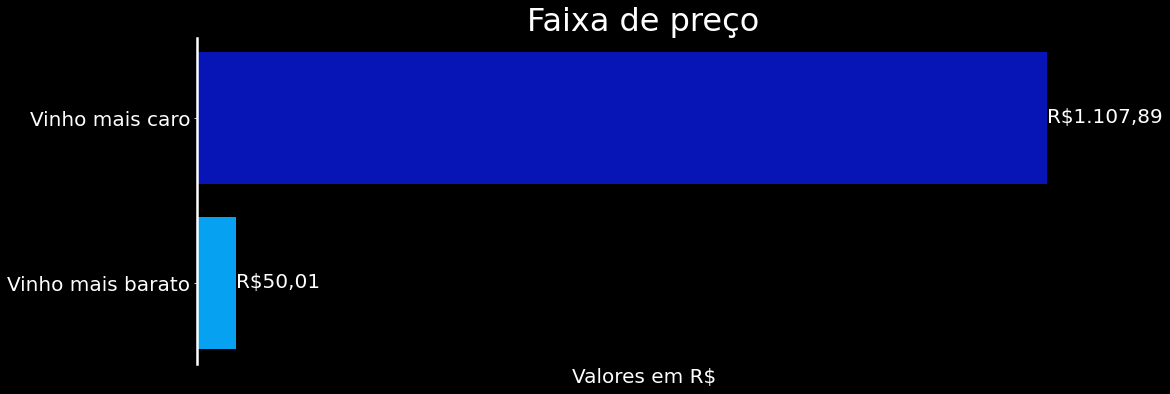

<Figure size 432x288 with 0 Axes>

In [74]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(16,6))

minmax_df = df['price'].agg(['max', 'min'])
labels = ['Vinho mais caro', 'Vinho mais barato']
prices = [f"R${preco:,.2f}".translate(f"R${preco:,.2f}".maketrans({',': '.', '.': ','})) for preco in minmax_df.values]
colors = ['#0715B7', '#06A1F1']

ax.barh(labels[::-1], minmax_df.values[::-1], color=colors[::-1])

for valor in range(len(labels)):
  ax.annotate(
      prices[::-1][valor],
      (minmax_df[::-1][valor], valor),
      ha='left',
      xytext=(0, -4),
      textcoords='offset points',
      fontsize=20
  )

ax.set_title('Faixa de preço', fontsize=32)
ax.set_xlabel('Valores em R$', fontsize=20)
ax.set_xticks([])
ax.set_yticklabels(labels[::-1], fontsize=20)

for border in ['top', 'right', 'bottom']:
  ax.spines[border].set_visible(False)

ax.spines['left'].set_linewidth(2.5)

plt.show()

plt.savefig('grafico_#1.png', dpi=360)

In [75]:
df['sub-total'] = df['quantity'].mul(df['price'])

In [76]:
df.groupby(df['date'].dt.month, as_index=False)['sub-total'].sum()

,sub-total
0,1437791.83
1,1379481.37
2,1462568.50
3,1475165.86
4,1450604.41
5,1370495.78
6,1479557.54
7,1338435.93
8,1431605.32
9,1403307.46


In [77]:
fat_mes = df.groupby(df['date'].dt.month, as_index=False)['sub-total'].sum()

fat_mes.insert(0, 'month_dsc', fat_mes.index.map({
    0: 'Jan',
    1: 'Fev',
    2: 'Mar',
    3: 'Abr',
    4: 'Mai',
    5: 'Jun',
    6: 'Jul',
    7: 'Ago',
    8: 'Set',
    9: 'Out',
    10: 'Nov',
    11: 'Dez',
}))

fat_mes.reset_index(inplace=True)

fat_mes.rename(columns={'index': 'month'}, inplace=True)

# Invertendo o gráfico
fat_mes = fat_mes.sort_values(by='month', ascending=False)

fat_mes

,month,month_dsc,sub-total
11,11,Dez,1322410.50
10,10,Nov,1440251.82
9,9,Out,1403307.46
8,8,Set,1431605.32
7,7,Ago,1338435.93
6,6,Jul,1479557.54
5,5,Jun,1370495.78
4,4,Mai,1450604.41
3,3,Abr,1475165.86
2,2,Mar,1462568.50


In [78]:
[f'R{num:_.2f}'.translate(f'R${num:_.2f}'.maketrans({'_': '.', '.': ','})) for num in fat_mes['sub-total'].to_list()]

['R1.322.410,50',
 'R1.440.251,82',
 'R1.403.307,46',
 'R1.431.605,32',
 'R1.338.435,93',
 'R1.479.557,54',
 'R1.370.495,78',
 'R1.450.604,41',
 'R1.475.165,86',
 'R1.462.568,50',
 'R1.379.481,37',
 'R1.437.791,83']

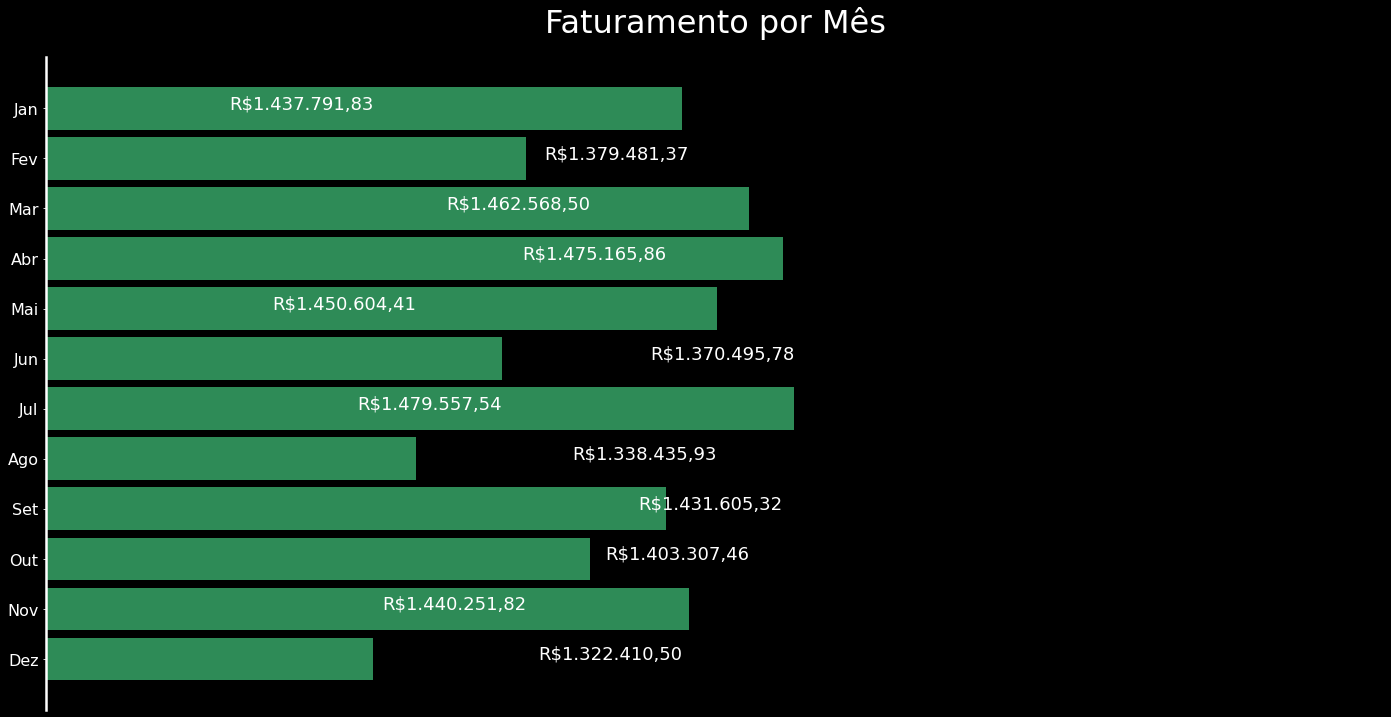

In [87]:
fig, ax = plt.subplots(figsize=(24, 12))

ax.barh(fat_mes['month_dsc'], fat_mes['sub-total'], height=0.85, color='seagreen')

valores_formatados = [f'R${num:_.2f}'.translate(f'R${num:_.2f}'.maketrans({'_': '.', '.':','})) for num in fat_mes['sub-total'].to_list()]

for valor in range(len(valores_formatados)):
  ax.annotate(
      valores_formatados[valor],
      (fat_mes['sub-total'][valor], valor),
      ha='right',
      xytext=(0, 0),
      textcoords='offset points',
      fontsize=18
  )

ax.set_title('Faturamento por Mês', pad=25, fontsize=32)
ax.set_yticklabels(labels=fat_mes['month_dsc'], fontsize=16)

ax.set_xlim([1_200_000, 1_700_000])

ax.set_xticks([])

for border in ['top', 'right', 'bottom']:
  ax.spines[border].set_visible(False)

ax.spines['left'].set_linewidth(2.5)

plt.show()



In [88]:
display(fat_mes[-3:])
display(fat_mes[:3])

,month,month_dsc,sub-total
2,2,Mar,1462568.50
1,1,Fev,1379481.37
0,0,Jan,1437791.83


,month,month_dsc,sub-total
11,11,Dez,1322410.50
10,10,Nov,1440251.82
9,9,Out,1403307.46


In [89]:
fat_mes.iloc[[0, 1, 2, 9, 10, 11]]

,month,month_dsc,sub-total
11,11,Dez,1322410.50
10,10,Nov,1440251.82
9,9,Out,1403307.46
2,2,Mar,1462568.50
1,1,Fev,1379481.37
0,0,Jan,1437791.83
